IMPORT LIBRARY

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

READ DATASET

In [2]:
df = pd.read_csv("fish_data.csv")

print(df)

                    species  length  weight  w_l_ratio
0        Anabas testudineus   10.66    3.45       0.32
1        Anabas testudineus    6.91    3.27       0.47
2        Anabas testudineus    8.38    3.46       0.41
3        Anabas testudineus    7.57    3.36       0.44
4        Anabas testudineus   10.83    3.38       0.31
...                     ...     ...     ...        ...
4075  Sillaginopsis panijus   30.56    6.12       0.20
4076  Sillaginopsis panijus   29.66    6.11       0.21
4077  Sillaginopsis panijus   32.81    6.25       0.19
4078  Sillaginopsis panijus   29.78    6.11       0.21
4079  Sillaginopsis panijus   31.62    6.14       0.19

[4080 rows x 4 columns]


EKSPLORASI DATA

In [3]:
df.describe()

,length,weight,w_l_ratio
count,4080.000000,4080.000000,4080.000000
mean,17.353544,3.739875,0.252782
std,7.114684,1.040365,0.123046
min,6.360000,2.050000,0.080000
25%,11.327500,3.070000,0.170000
50%,17.350000,3.310000,0.190000
75%,22.585000,4.100000,0.340000
max,33.860000,6.290000,0.640000


In [4]:
df.isnull().sum()

species      0
length       0
weight       0
w_l_ratio    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080 entries, 0 to 4079
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   species    4080 non-null   object 
 1   length     4080 non-null   float64
 2   weight     4080 non-null   float64
 3   w_l_ratio  4080 non-null   float64
dtypes: float64(3), object(1)
memory usage: 127.6+ KB


In [6]:
df.species.value_counts()

species
Setipinna taty            480
Anabas testudineus        476
Pethia conchonius         475
Otolithoides biauritus    468
Polynemus paradiseus      458
Sillaginopsis panijus     455
Otolithoides pama         435
Puntius lateristriga      418
Coilia dussumieri         415
Name: count, dtype: int64

SPLITING DATA

In [7]:
x = df.iloc[: , [1, 2, 3]].values
y = df.iloc[:, [0]].values

In [8]:
x

array([[10.66,  3.45,  0.32],
       [ 6.91,  3.27,  0.47],
       [ 8.38,  3.46,  0.41],
       ...,
       [32.81,  6.25,  0.19],
       [29.78,  6.11,  0.21],
       [31.62,  6.14,  0.19]])

In [9]:
y

array([['Anabas testudineus'],
       ['Anabas testudineus'],
       ['Anabas testudineus'],
       ...,
       ['Sillaginopsis panijus'],
       ['Sillaginopsis panijus'],
       ['Sillaginopsis panijus']], dtype=object)

FEATURE SCALING

In [10]:
sc = StandardScaler()

x = sc.fit_transform(x)

In [11]:
x

array([[-0.9409222 , -0.27866241,  0.54635083],
       [-1.46806569, -0.45169987,  1.76555488],
       [-1.26142544, -0.26904922,  1.27787326],
       ...,
       [ 2.17273871,  2.41303142, -0.51029267],
       [ 1.74680677,  2.27844673, -0.34773214],
       [ 2.00545851,  2.3072863 , -0.51029267]])

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size= 0.9, random_state=0)

In [13]:
print("X_train :", (len(x_train)))
print("X_test :", (len(x_test)))
print("Y_train :", (len(y_train)))
print("Y_test :", (len(y_test)))

X_train : 408
X_test : 3672
Y_train : 408
Y_test : 3672


MEMBUAT MODEL RANDOM FOREST

In [14]:
# Membuat model Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=0)

# Latih model dengan data latih
rf.fit(x_train, y_train)


C:\Users\Acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_estimators=200, random_state=0)

PREDIKSI

In [15]:
y_pred = rf.predict(x_test)

In [16]:
y_pred

array(['Puntius lateristriga', 'Pethia conchonius', 'Otolithoides pama',
       ..., 'Setipinna taty', 'Otolithoides biauritus',
       'Polynemus paradiseus'], dtype=object)

EVALUASI MODEL

In [22]:
# Cetak Confusion Matrix
print(confusion_matrix(y_test, y_pred))

# Cetak Classification Report
print(classification_report(y_test, y_pred))

# Cetak Akurasi
print(f"Hasil Akurasinya : {accuracy_score(y_test, y_pred): 5f}")


[[432   0   0   0   0   0   0   0   0]
 [  0 375   0   2   0   0   0   0   0]
 [  0   0 296   0   0   0   1 124   0]
 [  0   0   1 392   0   0   0   0   0]
 [  0   0   0   0 412   0   0   0   0]
 [  0   0   0   0   0 414   0   0   0]
 [ 11   0   0   0   0   0 355   0   0]
 [  0   0 126   0   0   0   0 311   0]
 [  0   0   0   0   0   0   0   0 420]]
                        precision    recall  f1-score   support

    Anabas testudineus       0.98      1.00      0.99       432
     Coilia dussumieri       1.00      0.99      1.00       377
Otolithoides biauritus       0.70      0.70      0.70       421
     Otolithoides pama       0.99      1.00      1.00       393
     Pethia conchonius       1.00      1.00      1.00       412
  Polynemus paradiseus       1.00      1.00      1.00       414
  Puntius lateristriga       1.00      0.97      0.98       366
        Setipinna taty       0.71      0.71      0.71       437
 Sillaginopsis panijus       1.00      1.00      1.00       420

      

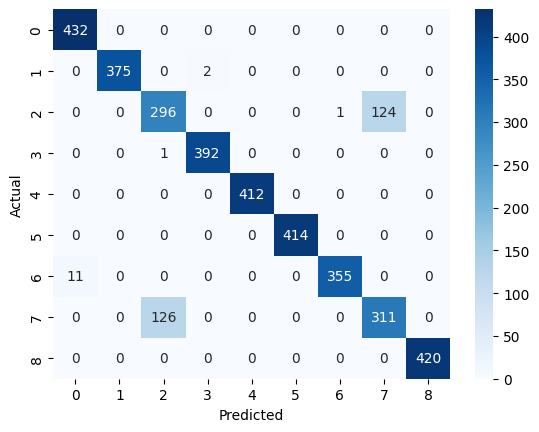

In [18]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


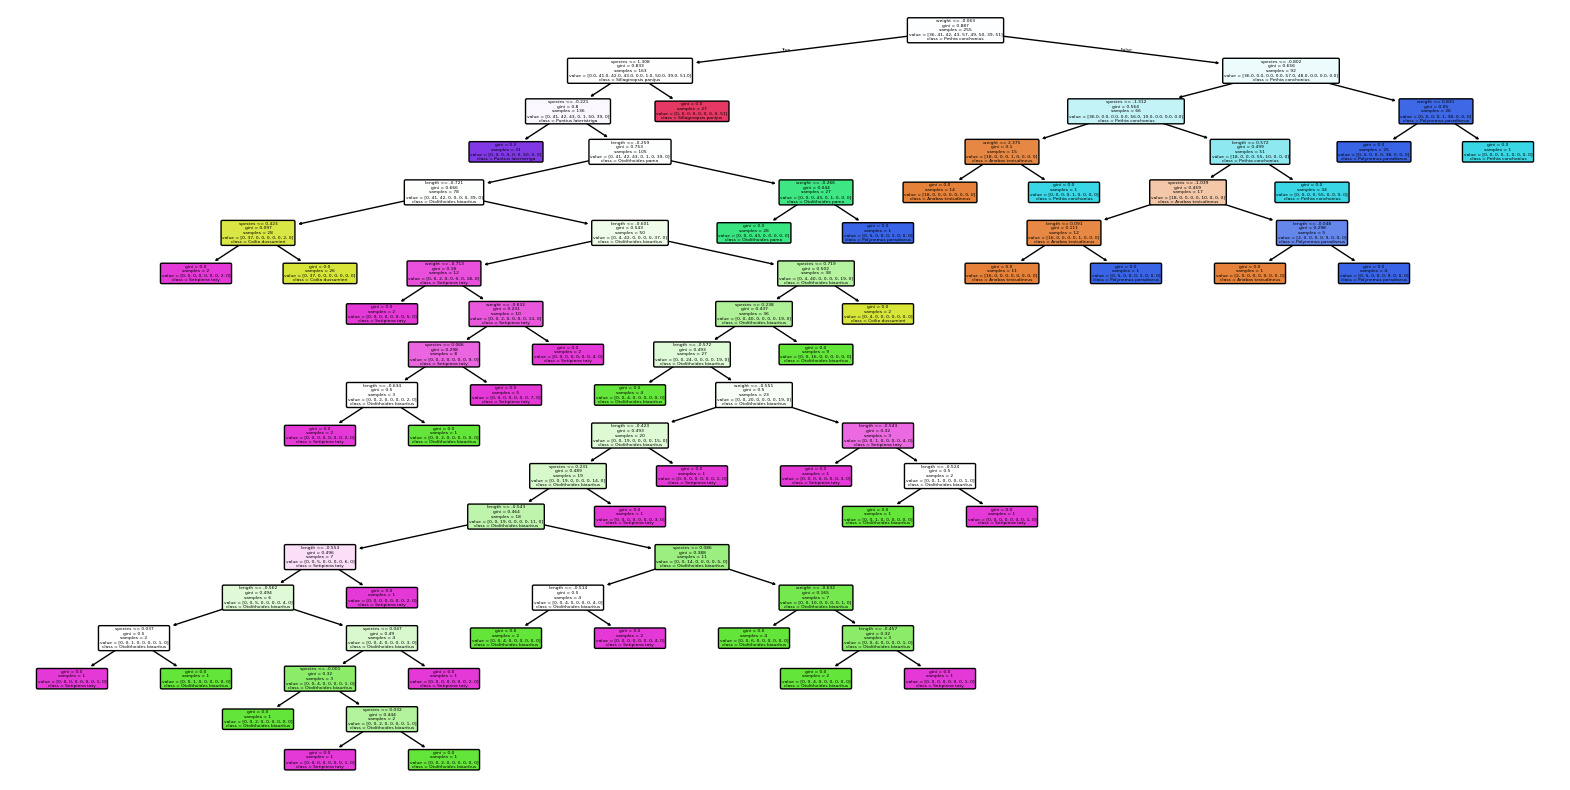

In [19]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualisasikan pohon keputusan
plt.figure(figsize=(20,10))
plot_tree(rf.estimators_[0],  # Ambil pohon pertama dari Random Forest
          filled=True,  # Mewarnai node dengan kelas yang diprediksi
          feature_names=df.columns,  # Nama fitur (misalnya df.columns)
          class_names=[
              'Anabas testudineus', 'Coilia dussumieri', 'Otolithoides biauritus', 'Otolithoides pama',
              'Pethia conchonius', 'Polynemus paradiseus', 'Puntius lateristriga', 'Setipinna taty',
              'Sillaginopsis panijus'
          ],  # Nama kelas target (nama spesies ikan)
          rounded=True)  # Membuat sudut node membulat
plt.show()


KLASIFIKASI DATA BARU

In [20]:
#Klasifikasi Data Baru

new_data = [[ 30.56   , 6.12    ,   0.20]]
new_data_scaler = sc.transform(new_data)
pred = rf.predict(new_data_scaler)

print("Data Baru adalah : ", pred)

Data Baru adalah :  ['Sillaginopsis panijus']


SAVE MODEL

In [21]:
import pickle

# Simpan scaler
with open('scaler_rf_fish.sav', 'wb') as file:
    pickle.dump(sc, file)

# Simpan model
with open('rf_model_fish_data.sav', 'wb') as file:
    pickle.dump(rf, file)

# Load the model
with open('rf_model_fish_data.sav', 'rb') as file:
    loaded_model = pickle.load(file)
with open('scaler_rf_fish.sav', 'rb') as file:
    loaded_scaler = pickle.load(file)